# KAJIAN PENERAPAN METODE LOGIKA FUZZY DALAM MENENTUKAN MAHASISWA TERBAIK
### Nama : ABDI BIMANTARA
### NIM    : 09011381722100
### Kelas : SK5U

<div class = "alert alert-success" role = "alert">
<b> ABSTRAK</b>:
<ul>
    <li> Logika Fuzzy adalah bagian atau salah satu model dalam kecerdasan buatan (Artificial Intelligence). salah satu contoh implementasi logika fuzzy yaitu proses menentukan mahasiswa terbaik menggunakan model logika fuzzy. Model Fuzzy Logic yang digunakan disini menggunakan metode mamdani. Dengan menggunakan metode mamdani ini kita dapat menentukan mahasiswa terbaik dari beberapa variabel inputan Nilai Akhir (0 - 100), Nilai Keaktifan (0 - 100), serta Nilai Prestasi (0 - 4.00)</li>
</ul>
</div>

secara umum, model logika fuzzy memiliki 4 Proses yaitu : 

* proses fuzzifikasi (fuzzification) : Proses dimana merubah suatu besaran nilai tegas (crisp) kedalam suatu besaran nilai fuzzy.
* Proses aturan : Proses dimana berisi aturan-aturan untuk  sistem pakar mengambil keputusan dengan menerapkan pengetahuan yang dimiliki.
* Proses Pengambilan Keputusan : Suatu proses dimana sistem pakar mengambil keputusan dengan menerapkan pengetahuan yang dimiliki.
* proses deffuzzifikasi (defuzzification):  Merupakan kebalikan dari proses fuzzifikasi yaitu proses  merubah besaran nilai  fuzzy menjadi besaran nilai tegas(crisp)


# 1. Proses import Library
Disini langkah pertama kita diharuskan untuk mengimport beberapa library yakni:
1. Numpy : library Numpy memiliki kegunaan untuk operasi vektor dan matriks. Fiturnya hampir sama dengan MATLAB dalam mengelola array dan array multidimensi
2. Scikit Fuzzy : Library ini adalah library untuk Operasi Matematika yang berfungsi untuk mencari nilai tengah atau nilai terbaik dari suatu perhitungan 
3. Matplotlib : Berfungsi untuk menampilkan gambar atau grafik dari suatu coding/perhitungan dalam cell python yang sedang berjalan 

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 2. Menentukan Membership Function dan NIlai Linguistik untuk INPUT dan Output

# Antecedent ( Variabel Inputan )

Nilai Akhir 
1. Kurang, ketika nilainya 0 -60
2. Cukup , ketika nilainya 45 - 75
3. Baik, ketika nilainya 60 - 100

Nilai Keaktifan 
1. Pasif, ketika nilainya 0 - 60
2. Aktif, ketika nilainya  45 - 75
3. Sangat Aktif, ketika nilainya  60 - 100

Nilai Prestasi
1. Dibawah standar, ketika nilainya 0 - 2.5
2. Standar, ketika nilainya  2 -3
3. Diatas Standar, ketika nilainya  2.5 - 4

# Consequent ( Variabel Output)
Hasil
1. Kurang Baik, ketika nilainya 0 -90
2. Cukup Baik, ketika nilainya  85 - 95
3. Sangat Baik, ketika nilainya  90 - 100

In [2]:
Keaktifan =  ctrl.Antecedent(np.arange(0,100,1), 'Keaktifan')
Keaktifan_x = np.arange(0,100,1) #untuk plotting saja

In [3]:
Akhir =  ctrl.Antecedent(np.arange(0,100,1), 'Akhir')
Akhir_x = np.arange(0,100,1) #untuk plotting saja

In [4]:
Prestasi =  ctrl.Antecedent(np.arange(0,4,0.1), 'Prestasi')
Prestasi_x = np.arange(0,4,0.1) #untuk plotting saja

In [5]:
Hasil =  ctrl.Consequent(np.arange(0,100,1), 'Hasil')
Hasil_x = np.arange(0,100,1) #untuk plotting saja

#  2.1. Fuzzyfikasi Nilai Keaktifan

Pada Variable Nilai Keaktifan memiliki 3 membership function yang bisa dilihat pada tabel dibawah ini 

![](1.png)

dan memiliki persamaan matematis seperti dibawah ini

\begin{equation}
  Keaktifan ['Pasif'] = \mu Pasif(x)=\begin{cases}
    1, & \text{$x\leq 60$}.\\
    (60 - x)/(60) , & \text{$ 0\leq x \leq 60$}.\\
  \end{cases}
  \\
  Keaktifan ['Aktif'] = \mu Aktif(x)=\begin{cases}
    (x - 45)/60 - 45) , & \text{$45 \leq x \leq 60$}.\\
    (75 - x)/(75 - 60) , & \text{$60 \leq x \geq 75$}.\\
  \end{cases}
  \\
    Keaktifan ['Sangat Aktif'] = \mu Sangat Aktif (x)=\begin{cases}
    (x - 60)/(100 -60) , & \text{$60 \leq x \leq 100$}.\\
    1 , & \text{$ x \geq 100$}.\\
  \end{cases}
\end{equation}

Setelah itu kita harus membuat nilai awal, nilai akhir dan nilai tengah berdasarkan dengan rentang nilai pada gambar diatas. Pada Nilai pasif dan sangat aktif itu kita gunakan fungsi trapesium ( Trampf) sedangkan untuk nilai Aktif kita gunakan fungsi segitiga (trimf)  


In [6]:
Keaktifan['Pasif'] = fuzz.trapmf(Keaktifan.universe, [0,0,45,60])
Keaktifan['Aktif'] = fuzz.trimf(Keaktifan.universe, [45,60,75])
Keaktifan['Sangat Aktif']  = fuzz.trapmf(Keaktifan.universe, [60,75,100,100])

# 2.1.1. PLOTTING MEMBERSHIP FUNCTION Nilai Keaktifan
jika sudah kita deklarasikan membership function dari nilai keaktifan maka selannjutnya kita akan memvisualisasikan masing masing dari variabel membership function tersebut

# a). Plot Nilai Keaktifan  Pasif

Text(0.5, 1.0, 'Keaktifan Pasif')

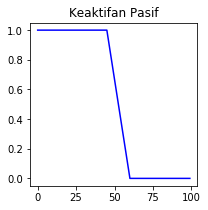

In [7]:
Keaktifan_Pasif= fuzz.trapmf(Keaktifan_x,[0,0,45,60])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Keaktifan_x,Keaktifan_Pasif,'blue')
ax0.set_title('Keaktifan Pasif')

# b). Plot Nilai Keaktifan  Aktif

Text(0.5, 1.0, 'Keaktifan Aktif')

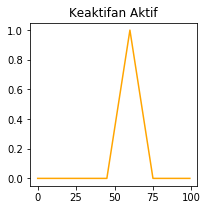

In [8]:
Keaktifan_Aktif= fuzz.trimf(Keaktifan_x,[45,60,75])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(3,3))
ax1.plot(Keaktifan_x,Keaktifan_Aktif,'orange')
ax1.set_title('Keaktifan Aktif')

# c). Plot Nilai Keaktifan  Sangat Aktif

Text(0.5, 1.0, 'Keaktifan Sangat Aktif')

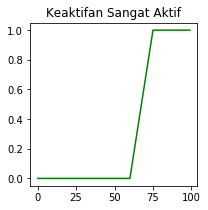

In [9]:
Keaktifan_SangatAktif= fuzz.trapmf(Keaktifan_x,[60,75,100,100])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(3,3))
ax2.plot(Keaktifan_x,Keaktifan_SangatAktif,'green')
ax2.set_title('Keaktifan Sangat Aktif')

Bagaimana jika kita gabungkan semua grafik dari membership function nilai Keaktifan menjadi satu

C:\Users\thinkpad\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


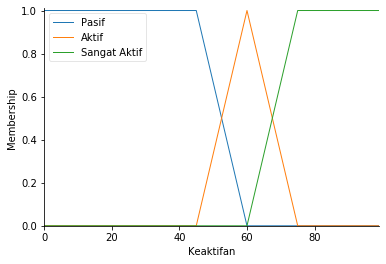

In [10]:
Keaktifan.view()

# 2.2. Fuzzyfikasi Nilai Akhir

Pada Variable Nilai Akhir memiliki 3 membership function juga yang bisa dilihat pada tabel dibawah ini 

![](2.png)

dan memiliki persamaan matematis seperti dibawah ini

\begin{equation}
  Akhir ['Kurang'] = \mu Kurang(x)=\begin{cases}
    1, & \text{$x\leq 60$}.\\
    (60 - x)/(60) , & \text{$ 0\leq x \leq 60$}.\\
  \end{cases}
  \\
  Akhir ['Cukup'] = \mu Cukup(x)=\begin{cases}
    (x - 45)/60 - 45) , & \text{$45 \leq x \leq 60$}.\\
    (75 - x)/(75 - 60) , & \text{$60 \leq x \geq 75$}.\\
  \end{cases}
  \\
    Akhir ['Baik'] = \mu Baik(x)=\begin{cases}
    (x - 60)/(100 -60) , & \text{$60 \leq x \leq 100$}.\\
    1 , & \text{$ x \geq 100$}.\\
  \end{cases}
\end{equation}

Setelah itu kita harus membuat nilai awal, nilai akhir dan nilai tengah berdasarkan dengan rentang nilai pada gambar diatas. Pada Nilai kurang dan baik itu kita gunakan fungsi trapesium ( Trampf) sedangkan untuk nilai Cukup kita gunakan fungsi segitiga (trimf)  

In [11]:
Akhir ['Kurang'] = fuzz.trapmf(Akhir.universe, [0,0,45,60])
Akhir ['Cukup'] = fuzz.trimf(Akhir.universe, [45,60,75])
Akhir ['Baik']  = fuzz.trapmf(Akhir.universe, [60,75,100,100])

# 2.2.1. PLOTTING MEMBERSHIP FUNCTION Nilai Akhir

jika sudah kita deklarasikan membership function dari nilai Akhir maka selannjutnya kita akan memvisualisasikan masing masing dari variabel membership function tersebut


# a). Plot Nilai Akhir Kurang

Text(0.5, 1.0, 'Nilai Akhir Kurang')

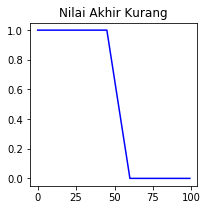

In [12]:
Akhir_Kurang = fuzz.trapmf(Akhir_x,[0,0,45,60])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Akhir_x,Akhir_Kurang,'blue')
ax0.set_title('Nilai Akhir Kurang')

# b). Plot Nilai Akhir Cukup

Text(0.5, 1.0, 'Nilai Akhir Cukup')

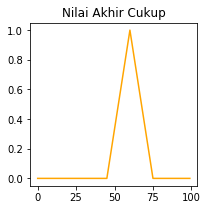

In [13]:
Akhir_Cukup = fuzz.trimf(Akhir_x,[45,60,75])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Akhir_x,Akhir_Cukup,'orange')
ax0.set_title('Nilai Akhir Cukup')

# c). Plot Nilai Akhir Baik

Text(0.5, 1.0, 'Nilai Akhir baik')

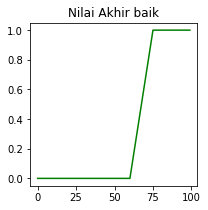

In [14]:
Akhir_Baik= fuzz.trapmf(Akhir_x,[60,75,100,100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Akhir_x,Akhir_Baik,'green')
ax0.set_title('Nilai Akhir baik')

Bagaimana jika kita gabungkan semua grafik dari membership function nilai Akhir menjadi satu

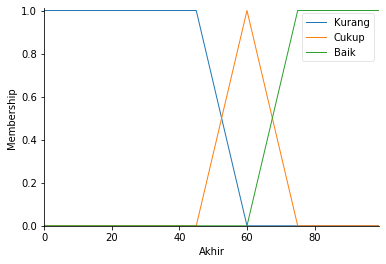

In [15]:
Akhir.view()

# 2.3 Fuzzyfikasi Nilai Prestasi

Pada Variable Nilai prestasi memiliki 3 membership function juga yang bisa dilihat pada tabel dibawah ini 

Untuk Variabel Nilai Prestasi, fungsi keanggotaan dibagi menjadi 3 bagian :

![](4.png)

dan memiliki persamaan matematis seperti dibawah ini

\begin{equation}
  Prestasi ['Dibawah Standar'] = \mu Dibawah Standar(x)=\begin{cases}
    1, & \text{$x\leq 25$}.\\
    (2.5 - x)/(2.5) , & \text{$ 0\leq x \leq 2.5 $}.\\
  \end{cases}
  \\
  Prestasi ['Standar'] = \mu Standar(x)=\begin{cases}
    (x - 2)/(2.5 - 2) , & \text{$ 2 \leq x \leq 2.5 $}.\\
    (3 - x)/(3 - 2.5) , & \text{$ 2.5 \leq x \leq 3$}.\\
  \end{cases}
  \\
    Prestasi ['Diatas Standar'] = \mu Diatas Standar(x)=\begin{cases}
    (x - 2.5)/(100 -60) , & \text{$ 2.5 \leq x \leq 4 $}.\\
    1 , & \text{$ x \geq 4 $}.\\
  \end{cases}
\end{equation}

Setelah itu kita harus membuat nilai awal, nilai akhir dan nilai tengah berdasarkan dengan rentang nilai pada gambar diatas. Pada Nilai dibawah Standar dan Diatas Standar itu kita gunakan fungsi trapesium ( Trampf) sedangkan untuk nilai Standar kita gunakan fungsi segitiga (trimf) 

In [16]:
Prestasi ['Dibawah Standar'] = fuzz.trapmf(Prestasi.universe, [0,0,2,2.5])
Prestasi ['Standar'] = fuzz.trimf(Prestasi.universe, [2,2.5,3])
Prestasi ['Diatas Standar']  = fuzz.trapmf(Prestasi.universe, [2.5,3,4,4])

# 2.3.1. PLOTTING MEMBERSHIP FUNCTION  Nilai Prestasi

jika sudah kita deklarasikan membership function dari nilai Prestasi maka selannjutnya kita akan memvisualisasikan masing masing dari variabel membership function tersebut

# a). Plot Nilai Prestasi Dibawah Standar

Text(0.5, 1.0, 'Prestasi Dibawah Standar')

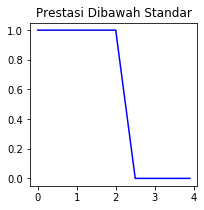

In [17]:
Prestasi_DibawahStandar = fuzz.trapmf(Prestasi_x,[0,0,2,2.5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Prestasi_x,Prestasi_DibawahStandar,'blue')
ax0.set_title('Prestasi Dibawah Standar')

# b). Plot Nilai Prestasi Standar

Text(0.5, 1.0, 'Prestasi Standar')

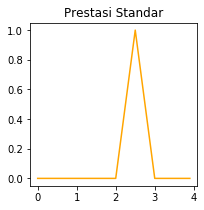

In [18]:
Prestasi_Standar = fuzz.trimf(Prestasi_x,[2,2.5,3])
fig5, (ax6) = plt.subplots(nrows=1,figsize=(3,3))
ax6.plot(Prestasi_x,Prestasi_Standar,'Orange')
ax6.set_title('Prestasi Standar')

# c). Plot Nilai Prestasi Diatas Standar

Text(0.5, 1.0, 'Prestasi Diatas Standar')

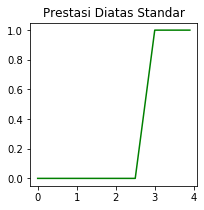

In [19]:
Prestasi_DiatasStandar = fuzz.trapmf(Prestasi_x,[2.5,3,4,4])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Prestasi_x,Prestasi_DiatasStandar,'green')
ax0.set_title('Prestasi Diatas Standar')

Bagaimana jika kita gabungkan semua grafik dari membership function nilai Akhir menjadi satu

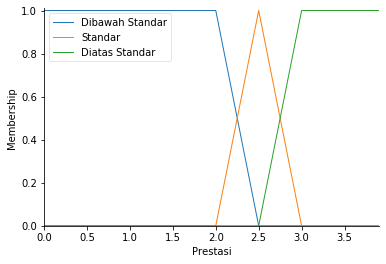

In [20]:
Prestasi.view()

# 2.4. Fuzzyfikasi Nilai Hasil 

Pada Variable Nilai prestasi memiliki 3 membership function juga yang bisa dilihat pada tabel dibawah ini 

![](5.png)

dan memiliki persamaan matematis seperti dibawah ini

\begin{equation}
  Hasil ['Kurang'] = \mu Kurang Baik(x)=\begin{cases}
    1, & \text{$x\leq 90$}.\\
    (90 - x)/(90) , & \text{$ 0\leq x \leq 90 $}.\\
  \end{cases}
  \\
  Hasil ['Cukup Baik'] = \mu Cukup Baik(x)=\begin{cases}
    (x - 85)/(90 - 85) , & \text{$ 85 \leq x \leq 90 $}.\\
    (95 - x)/(95 - 90) , & \text{$ 90 \leq x \leq 95 $}.\\
  \end{cases}
  \\
    Hasil ['Sangat Baik'] = \mu Sangat Baik(x)=\begin{cases}
    (x - 90)/(100 - 90) , & \text{$ 90 \leq x \leq 100 $}.\\
    1 , & \text{$ x \geq 100 $}.\\
  \end{cases}
\end{equation}

Setelah itu kita harus membuat nilai awal, nilai akhir dan nilai tengah berdasarkan dengan rentang nilai pada gambar diatas. Pada Nilai dibawah Kurang Baik dan Sangat Baik itu kita gunakan fungsi trapesium ( Trampf) sedangkan untuk nilai Cukup baik kita gunakan fungsi segitiga (trimf) 

In [21]:
Hasil['Kurang Baik'] = fuzz.trapmf(Hasil.universe, [0,0,85,90])
Hasil['Cukup Baik'] = fuzz.trimf(Hasil.universe, [85,90,95])
Hasil['Sangat Baik']  = fuzz.trapmf(Hasil.universe, [90,95,100,100])

# 2.4. PLOTTING MEMBERSHIP FUNCTION Nilai Hasil

# a). Plot Nilai Hasil Kurang baik

Text(0.5, 1.0, 'Hasil Kurang Baik')

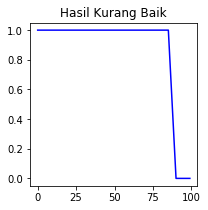

In [22]:
Hasil_KurangBaik = fuzz.trapmf(Hasil_x,[0,0,85,90])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Hasil_x,Hasil_KurangBaik,'Blue')
ax0.set_title('Hasil Kurang Baik')

# b). Plot Nilai Hasil cukup baik

Text(0.5, 1.0, 'Hasil Cukup Baik')

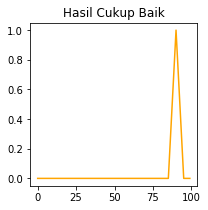

In [23]:
Hasil_CukupBaik = fuzz.trimf(Hasil_x,[85,90,95])
fig10, (ax11) = plt.subplots(nrows=1,figsize=(3,3))
ax11.plot(Hasil_x,Hasil_CukupBaik,'Orange')
ax11.set_title('Hasil Cukup Baik')

# c). Plot Nilai Hasil sangat baik

Text(0.5, 1.0, 'Hasil Sanagat Baik')

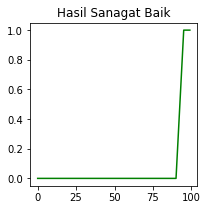

In [25]:
Hasil_SangatBaik = fuzz.trapmf(Hasil_x,[90,95,100,100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(3,3))
ax0.plot(Hasil_x,Hasil_SangatBaik,'Green')
ax0.set_title('Hasil Sanagat Baik')

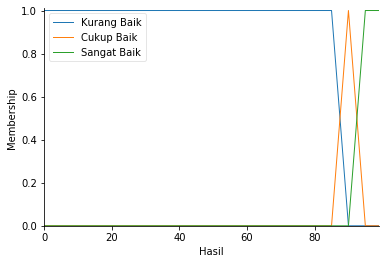

In [26]:
Hasil.view()

# 3. Menentukan Rule Base
Pada tahap ini kita akan membuat beberapa aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN .... sebagai dasar untuk mengambil keputusan 

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel Nilai Alhir yang berjumlah 3, variabel Nilai Keaktifan yang berjumlah 3 dan fuzzifikasi dari variabel Nilai Prestasi yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 x 3 = 27 rule

In [27]:
rule01 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Pasif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule02 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Pasif'] & Prestasi['Standar'] , Hasil['Kurang Baik'])
rule03 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Pasif'] & Prestasi['Diatas Standar'] , Hasil['Kurang Baik'])
rule04 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Aktif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule05 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Aktif'] & Prestasi['Standar'] , Hasil['Kurang Baik'])
rule06 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Aktif'] & Prestasi['Diatas Standar'] , Hasil['Kurang Baik'])
rule07 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Sangat Aktif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule08 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Sangat Aktif'] & Prestasi['Standar'] , Hasil['Kurang Baik'])
rule09 = ctrl.Rule(Akhir['Kurang']  & Keaktifan['Sangat Aktif'] & Prestasi['Diatas Standar'] , Hasil['Kurang Baik'])
rule10 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Pasif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule11 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Pasif'] & Prestasi['Standar'] , Hasil['Kurang Baik'])
rule12 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Pasif'] & Prestasi['Diatas Standar'] , Hasil['Kurang Baik'])
rule13 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Aktif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule14 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Aktif'] & Prestasi['Standar'] , Hasil['Cukup Baik'])
rule15 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Aktif'] & Prestasi['Diatas Standar'] , Hasil['Sangat Baik'])
rule16 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Sangat Aktif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule17 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Sangat Aktif'] & Prestasi['Standar'] , Hasil['Cukup Baik'])
rule18 = ctrl.Rule(Akhir['Cukup']  & Keaktifan['Sangat Aktif'] & Prestasi['Diatas Standar'] , Hasil['Cukup Baik'])
rule19 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Pasif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule20 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Pasif'] & Prestasi['Standar'] , Hasil['Kurang Baik'])
rule21 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Pasif'] & Prestasi['Diatas Standar'] , Hasil['Kurang Baik'])
rule22 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Aktif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule23 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Aktif'] & Prestasi['Standar'] , Hasil['Cukup Baik'])
rule24 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Aktif'] & Prestasi['Diatas Standar'] , Hasil['Cukup Baik'])
rule25 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Sangat Aktif'] & Prestasi['Dibawah Standar'] , Hasil['Kurang Baik'])
rule26 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Sangat Aktif'] & Prestasi['Standar'] , Hasil['Cukup Baik'])
rule27 = ctrl.Rule(Akhir['Baik']  & Keaktifan['Sangat Aktif'] & Prestasi['Diatas Standar'] , Hasil['Sangat Baik'])

Setelah rule base selesai kita buat seperti diatas, selanjutnya kita harus menggabungkan semua rule tersebut menjadi suatu kontrol dari sistem fuzzy agar dapat disimulasikan kedalam sistem control

# RULE EVALUATION

In [28]:
Sistem_ctrl = ctrl.ControlSystem([rule01, rule02, rule03, rule04, rule05, rule06, rule07, rule08, rule09, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])

Setelah kita gabungkan semua rule diatas menjadi satu maka ada baiknya kita memvisualisasikan rule tersebut  

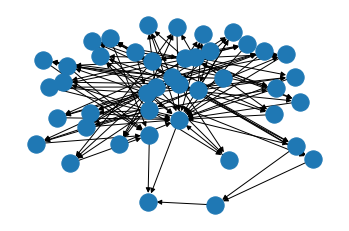

In [41]:
Sistem_ctrl.view()

# 4. DEFUZZIFIKASI

In [29]:
Sistem = ctrl.ControlSystemSimulation(Sistem_ctrl)

# Kasus

jika diketahui Besar Nilai Akhir 70, Besar Nilai Keaktifan 70, dan besar Nilai Prestasi sebesar 3.0, maka termasuk jenis mana mahasiswa mana ?

In [51]:
Sistem.input['Akhir'] = 70
Sistem.input['Keaktifan'] = 70
Sistem.input['Prestasi'] = 4
Sistem.compute()

In [52]:
print(Sistem.output['Hasil'])

93.49999999999997


Plotting fungsi keangggotaan Nilai Akhir setelah dimasukkan input nilai pada Nilai Akhir

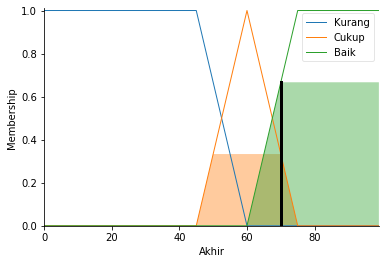

In [45]:
Akhir.view(sim=Sistem)

Plotting fungsi keangggotaan Nilai Keaktifan setelah dimasukkan input nilai pada Nilai Keaktifan

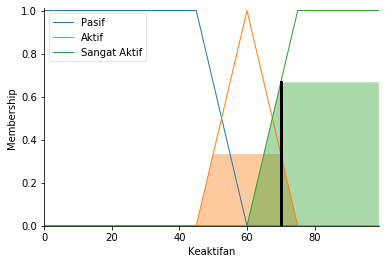

In [46]:
Keaktifan.view(sim=Sistem)

Plotting fungsi keangggotaan Nilai Prestasi setelah dimasukkan input nilai pada Nilai Prestasi

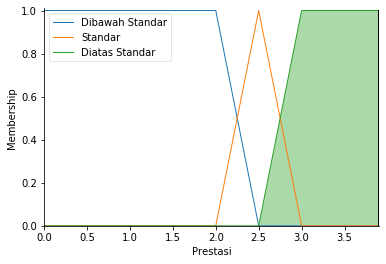

In [47]:
Prestasi.view(sim=Sistem)

Plotting fungsi keangggotaan Nilai setelah dilakukan perhitungan defuzzifikasi output nilai pada Nilai Hasil

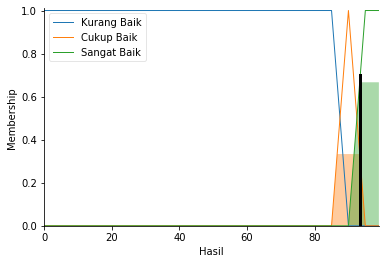

In [48]:
Hasil.view(sim=Sistem)

# Perhitungan Manual 

\begin{equation}
    Nilai Akhir =70 \\
    Masukkan\,nilai\,Akhir\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,akhir\\
  Akhir ['Kurang'] = \mu Kurang(x)=\begin{cases}
    1, & \text{$x\leq 60$}.\\
    (60 - x)/(60) , & \text{$ 0\leq x \leq 60$}.\\
  \end{cases}
  \\
  Akhir ['Cukup'] = \mu Cukup(x)=\begin{cases}
    (x - 45)/60 - 45) , & \text{$45 \leq x \leq 60$}.\\
    (75 - x)/(75 - 60) , & \text{$60 \leq x \geq 75$}. \checkmark\\
  \end{cases}
  \\
    Akhir ['Baik'] = \mu Baik(x)=\begin{cases}
    (x - 60)/(100 -60) , & \text{$60 \leq x \leq 100$}. \checkmark\\
    1 , & \text{$ x \geq 100$}.\\
  \end{cases}
\end{equation}


\begin{equation}
    \mu NilaiAkhirfCukup(70) = (75 - 70) / (75 - 60) \\
    \mu NilaiAkhirCukup(70) = 1/3 \\ 
    \mu NilaiAkhirCukup(70) = 0.33 \\
    \mu NilaiAkhirBaik (70) = (70 - 60) / (100-60) \\
    \mu NilaiAkhirBaik(70) = 1/4 \\
    \mu NilaiAkhirBaik(70) = 0.25 \\
\end{equation}

\begin{equation}
    Nilai Keaktifan =70 \\
    Masukkan\,nilai\,Keaktifan\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Keaktifan\\
 Keaktifan ['Pasif'] = \mu Pasif(x)=\begin{cases}
    1, & \text{$x\leq 60$}.\\
    (60 - x)/(60) , & \text{$ 0\leq x \leq 60$}.\\
  \end{cases}
  \\
  Keaktifan ['Aktif'] = \mu Aktif(x)=\begin{cases}
    (x - 45)/60 - 45) , & \text{$45 \leq x \leq 60$}.\\
    (75 - x)/(75 - 60) , & \text{$60 \leq x \geq 75$}. \checkmark\\
  \end{cases}
  \\
    Keaktifan ['Sangat Aktif'] = \mu Sangat Aktif (x)=\begin{cases}
    (x - 60)/(100 -60) , & \text{$60 \leq x \leq 100$}. \checkmark\\
    1 , & \text{$ x \geq 100$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu NilaiKeaktifanAktif(70) = (75 - 70) / (75 - 60) \\
    \mu NilaiKeaktifanAktif(70) = 1/3 \\ 
    \mu NilaiKeaktifanAktif(70) = 0.33 \\
    \mu NilaiKeaktifanSangatAktif (70) = (70 - 60) / (100-60) \\
    \mu NilaiKeaktifanSangatAktif(70) = 1/4 \\
    \mu NilaiKeaktifanSangatAktif(70) = 0.25 \\
\end{equation}

\begin{equation}
    Nilai Prestasi = 3 \\
    Masukkan\,nilai\,Prestasi\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Prestasi\\
  Prestasi ['Dibawah Standar'] = \mu Dibawah Standar(x)=\begin{cases}
    1, & \text{$x\leq 25$}.\\
    (2.5 - x)/(2.5) , & \text{$ 0\leq x \leq 2.5 $}.\\
  \end{cases}
  \\
  Prestasi ['Standar'] = \mu Standar(x)=\begin{cases}
    (x - 2)/(2.5 - 2) , & \text{$ 2 \leq x \leq 2.5 $}. \checkmark\\
    (3 - x)/(3 - 2.5) , & \text{$ 2.5 \leq x \leq 3$}. \checkmark\\
  \end{cases}
  \\
    Prestasi ['Diatas Standar'] = \mu Diatas Standar(x)=\begin{cases}
    (x - 2.5)/(100 -60) , & \text{$ 2.5 \leq x \leq 4 $}. \checkmark\\
    1 , & \text{$ x \geq 4 $}.\\
  \end{cases}
\end{equation}


\begin{equation}
    \mu NilaiPrestasiStandar(3) = (3 - 2) / (2.5 - 2) \\
    \mu NilaiPrestasiStandar(3) = 1/0.5 \\ 
    \mu NilaiPrestasiStandar(3) = 2 \\
    \mu NilaiPrestasiStandar(3) = (3 - 3) / (3 - 2.5) \\
    \mu NilaiPrestasiStandar(3) = 0/0.5 \\ 
    \mu NilaiPrestasiStandar(3) = 0 \\
    \mu NilaiPrestasiDiatasStandar(3) = (3 - 2.5) / (4-2.5) \\
    \mu NilaiPrestasiDiatasStandar(3) = (1/2)/1.5 \\
    \mu NilaiPrestasiDiatasStandar(3) = 0.33 \\
\end{equation}

# Karena Nilai Akhir tidak menyinggung daerah Kurang, Nilai Keaktifan tidak menyinggung daerah Pasif dan Nilai Prestasi juga tidak Menyinggung daerah Dibawah Standar maka nilai dari persamaan Kurang, Pasif dan Dibawah Standar bernilai 0

- rule1 =MIN(μKurang & μPasif &μDibawahStandar)
        =MIN(0 & 0 & 0)
        = 0
- rule2 =MIN(μKurang & μPasif &μStandar)
        =MIN(0 & 0 & 0)
        =0
- rule3 =MIN(μKurang & μPasif &μDiatasStandar)
        =MIN(0 & 0 & 0.33)
        =0
- rule4 =MIN(μKurang & μAktif &μDibawahStandar)
        =MIN(0 & 0.33 & 0)
        =0
- rule5 =MMIN(μKurang & μAktif &μStandar)
        =MIN(0 & 0.33 & 0)
        =0
- rule6 =MIN(μKurang & μAktif &μDiatasStandar)
        =MIN(0 & 0.33 & 0.33)
        =0
- rule7 =MIN(μKurang & μSangat Aktif &μDibawahStandar)
        =MIN(0 & 0.25 & 0)
        =0
- rule8 =MIN(μKurang & μSangat Aktif &μStandar)
        =MIN(0 & 0.25 & 0)
        =0
- rule9 =MIN(μKurang & μSangat Aktif &μDiatasStandar)
        =MIN(0 & 0.25 & 0.33)
        =0
- rule10=MIN(μCukup & μPasif &μDibawahStandar)
        =MIN(0.33 & 0 & 0)
        =0
- rule11=MIN(μCukup & μPasif &μStandar)
        =MIN(0.33 & 0 & 0)
        =0
- rule12=MIN(μCukup & μPasif &μDiatasStandar)
        =MIN(0.33 & 0 & 0.33)
        =0
- rule13=MIN(μCukup & μAktif &μDibawahStandar)
        =MIN(0.33 & 0.33 & 0)
        =0
- rule14=MIN(μCukup & μAktif &μStandar)
        =MIN(0.33 & 0.33 & 0)
        =0
- rule15=MIN(μCukup & μAktif &μDiatasStandar)
        =MIN(0.33 & 0.33 & 0.33)
        =0.33
- rule16=MIN(μCukup & μSangatAktif &μDibawahStandar)
        =MIN(0.33 & 0.25 & 0)
        =0
- rule17=MIN(μCukup & μSangatAktif &μStandar)
        =MIN(0.33 & 0.25 & 0)
        =0
- rule18=MIN(μCukup & μSangatAktif &μDiatasStandar)
        =MIN(0.33 & 0.25 & 0.33)
        =0.25
- rule19=MIN(μBaik & μPasif &μDibawahStandar)
        =MIN(0.25 & 0 & 0)
        =0
- rule20=MIN(μBaik & μPasif &μStandar)
        =MIN(0.25 & 0 & 0)
        =0 
- rule21=MIN(μBaik & μPasiif &μDiatasStandar)
        =MIN(0.25 & 0 & 0.33)
        =0
- rule22=MIN(μBaik & μAktif &μDibawahStandar)
        =MIN(0.25 & 0.33 & 0)
        =0
- rule23=MIN(μBaik & μAktif &μStandar)
        =MIN(0.25 & 0.33 & 0)
        =0
- rule24=MIN(μBaik & μAktif &μDiatasStandar)
        =MIN(0.25 & 0.33 & 0.033)
        =0.25
- rule25=MIN(μBaik & μSangatAktif &μDibawahStandar)
        =MIN(0.25 & 0.25 & 0)
        =0
- rule26=MIN(μBaik & μSangatAktif &μStandar)
        =MIN(0.25 & 0.25 & 0)
        =0
- rule27=MIN(μBaik & μSangatAktif &μDiatasStandar)
        =MIN(0.25 & 0.25 & 0.33)
        =0.25

# Menghitung Rule (Z)

Setelah membandingkan ketiga nilai tersebut, Nilai dari setiap Rule tersebut akan Menjadi nilai PREDIC untuk variable Nilai Hasil Atau Variable output. Nilai PREDIC digunakan untuk mencari Nilai Z dan ketiga nilai tersebut digunakan mencari Nilai total.

#CATATAN : Untuk Rule 1 sd 14, 16,17,19 sd 23, 25 dan 26 tidak dihitung karena Nilai PREDIC pada rule tersebut adalah 0, 
karena salah satu dari perbandingan rule bernilai 0 dan tidak akan berpengaruh pada nilai hasil. 
Perhitungan total hanya menggunakan Rule 15,18,24 dan 27

# Rule 15
IF Nilai Akhir Cukup AND Nilai Keaktifan Aktif AND Nilai Prestasi Diatas Standar THEN Hasil Cukup Baik

Lalu lihat himpunan Hasil Cukup Baik  
$$
    Hasil ['Cukup Baik'] = \mu Cukup Baik(x)=\begin{cases}
    (x - 85)/(90 - 85) , & \text{$ 85 \leq x \leq 90 $}.\\
    (95 - x)/(95 - 90) , & \text{$ 90 \leq x \leq 95 $}.\\
  \end{cases}
 $$
Terdapat 2 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x-85) / (90 -85) = 0.33 \\
(x-85) = 1.65 \\ 
 x = 86.65 \\
$$


$$
(95-x) / (95 -90) = 0.33 \\
(95-x) = 1.65 \\ 
 x = 93.35\\
$$

Akan diambil nilai terkecil, Maka nilai Z$_1$$_5$ = 86.65


===============================================================================================================

# Rule 18 
 IF Nilai Akhir Cukup AND Nilai Keaktifan Sangat Aktif AND Nilai Prestasi Diatas Standar THEN Hasil Cukup Baik
 
 Lalu lihat himpunan Hasil Cukup Baik  
$$
    Hasil ['Cukup Baik'] = \mu Cukup Baik(x)=\begin{cases}
    (x - 85)/(90 - 85) , & \text{$ 85 \leq x \leq 90 $}.\\
    (95 - x)/(95 - 90) , & \text{$ 90 \leq x \leq 95 $}.\\
  \end{cases}
 $$
Terdapat 2 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x-85) / (90 -85) = 0.25 \\
(x-85) = 1.25 \\ 
 x = 86.25 \\
$$


$$
(95-x) / (95 -90) = 0.25 \\
(95-x) = 1.25 \\ 
 x = 93.75\\
$$

Akan diambil nilai terkecil, Maka nilai Z$_1$$_8$ = 86.25

===============================================================================================================

# Rule 24 
 IF Nilai Akhir Baik AND Nilai Keaktifan Aktif AND Nilai Prestasi Diatas Standar THEN Hasil Cukup Baik
 
 Lalu lihat himpunan Hasil Cukup Baik  
$$
    Hasil ['Cukup Baik'] = \mu Cukup Baik(x)=\begin{cases}
    (x - 85)/(90 - 85) , & \text{$ 85 \leq x \leq 90 $}.\\
    (95 - x)/(95 - 90) , & \text{$ 90 \leq x \leq 95 $}.\\
  \end{cases}
 $$
Terdapat 2 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x-85) / (90 -85) = 0.25 \\
(x-85) = 1.25 \\ 
 x = 86.25 \\
$$


$$
(95-x) / (95 -90) = 0.25 \\
(95-x) = 1.25 \\ 
 x = 93.75\\
$$

Akan diambil nilai terkecil, Maka nilai Z$_2$$_4$ = 86.25

===============================================================================================================

# Rule 27 
 IF Nilai Akhir Baik AND Nilai Keaktifan Sangat Aktif AND Nilai Prestasi Diatas Standar THEN Hasil Sangat Baik
 
 Lalu lihat himpunan Hasil Sangat Baik  
$$
    Hasil ['Sangat Baik'] = \mu Sangat Baik(x)=\begin{cases}
    (x - 90)/(100 - 90) , & \text{$ 90 \leq x \leq 100 $}.\\
    1 , & \text{$ x \geq 100 $}.\\
  \end{cases}
 $$
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x-90) / (100 -90) = 0.25 \\
(x-90) = 2.5 \\ 
 x = 92.5 \\
$$

Maka nilai Z$_2$$_7$= 92.5


Dari sini kita dapat mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_0 +
\alpha predikat_1\,_1 \times Z_1\,_1 +
\alpha predikat_1\,_2 \times Z_1\,_2 +
\alpha predikat_1\,_3 \times Z_1\,_3 +
\alpha predikat_1\,_4 \times Z_1\,_4 +
\alpha predikat_1\,_5 \times Z_1\,_5 +
\alpha predikat_1\,_6 \times Z_1\,_6 +
\alpha predikat_1\,_7 \times Z_1\,_7 +
\alpha predikat_1\,_8 \times Z_1\,_8 +
\alpha predikat_1\,_9 \times Z_1\,_9 +
\alpha predikat_2\,_0 \times Z_2\,_0 +
\alpha predikat_2\,_1 \times Z_2\,_1 +
\alpha predikat_2\,_2 \times Z_2\,_2 +
\alpha predikat_2\,_3 \times Z_2\,_3 +
\alpha predikat_2\,_4 \times Z_2\,_4 +
\alpha predikat_2\,_5 \times Z_2\,_5 +
\alpha predikat_2\,_6 \times Z_2\,_6 +
\alpha predikat_2\,_7 \times Z_2\,_7}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2
+\alpha predikat_1\,_3 +\alpha predikat_1\,_4 +\alpha predikat_1\,_5
+\alpha predikat_1\,_6 +\alpha predikat_1\,_7+\alpha predikat_1\,_8+\alpha predikat_1\,_9
+\alpha predikat_2\,_0 + \alpha predikat_2\,_1 + \alpha predikat_2\,_2 +\alpha predikat_2\,_3 +
\alpha predikat_2\,_4 + \alpha predikat_2\,_5 +\alpha predikat_2\,_6 + \alpha predikat_2\,_7}$$

 $$ Z = \frac{94.9}{1.03} $$
 $$ Z = 92.13 $$

untuk output pertama python (komputasi) memiliki nilai sebesar 93.49 , sedangkan dengan penghitungan manual memilki nilai 92.13 . selisih antara hitungan manual python dengan penghitungan komputasi sebesar 1.36 


<div class = "alert alert-success" role = "alert">
<b> HASIL</b>:
<ul>
     untuk output pertama python (komputasi) memiliki nilai sebesar 93.49 , sedangkan dengan penghitungan manual memilki nilai 92.13 . selisih antara hitungan manual python dengan penghitungan komputasi sebesar 1.36 </li>
</ul>
</div>

 <div class="alert alert-warning">
<div>
    
# Referensi

## Paper 
* Judul   : KAJIAN PENERAPAN METODE LOGIKA FUZZY DALAM MENENTUKAN MAHASISWA TERBAIK. 
* Penulis : Andi Saryoko
* Jurnal  : Jurnal Pilar Nusa Mandiri 